In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import datetime

In [166]:
'''This is just where I brought in data from an excel spreadsheet.'''
hourlydata = pd.read_excel('fuelbyhour.xlsx')

In [167]:
'''Remove the year as its always the same'''
hourlydata = hourlydata.drop(['DeliveryYear'],axis=1)

In [168]:
'''Fills in the hour for the types as it read as NaN.'''
for j in range(len(hourlydata)-1):
    if math.isnan(hourlydata.iloc[j+1,1]) == True:
        hourlydata.iloc[j+1,1] = hourlydata.iloc[j,1]

,Day,Hour,Fuel,Output
0,2018-01-01,1.0,NUCLEAR,11671
1,NaN,1.0,GAS,1583
2,NaN,1.0,HYDRO,4152
3,NaN,1.0,WIND,992
4,NaN,1.0,SOLAR,0
5,NaN,1.0,BIOFUEL,3
6,NaN,2.0,NUCLEAR,11672
7,NaN,2.0,GAS,1192
8,NaN,2.0,HYDRO,4093
9,NaN,2.0,WIND,1124


In [169]:
'''Fills in the date on the entries.'''
Na = hourlydata['Day'].isna()
for j in range(len(hourlydata)-1):
    if Na[j+1] == True:
        hourlydata.iloc[j+1,0] = hourlydata.iloc[j,0]

In [170]:
'''Gets our date into the right data type'''
hourlydata['Day'] = pd.to_datetime(hourlydata['Day'])

'''Converts from integer to float because python wants that for some reason.'''
for i in range(len(hourlydata)):
    hourlydata.iloc[i,2] = float(hourlydata.iloc[i,2])

In [172]:
'''Puts the data together nicely as "newframe" '''
#newframe = (workingframe.groupby(['Day','Hour','Fuel'])['Output'].mean())

'Puts the data together nicely as "newframe" '

In [173]:
'''Sends the structure to a pickle for use in other scripts'''
#newframe.to_pickle('EnergyOutput')

'Sends the structure to a pickle for use in other scripts'

In [174]:
#Output = pd.read_pickle('EnergyOutput')

In [201]:
#hourlydata = hourlydata.set_index('Day')
Nuclear = hourlydata.where(hourlydata['Fuel']=='NUCLEAR').dropna()
Nuclear = Nuclear.reset_index()
Nuclear = Nuclear.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Nuclear'})

Gas = hourlydata.where(hourlydata['Fuel']=='GAS').dropna()
Gas = Gas.reset_index()
Gas = Gas.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Gas'})

Hydro = hourlydata.where(hourlydata['Fuel']=='HYDRO').dropna()
Hydro = Hydro.reset_index()
Hydro = Hydro.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Hydro'})

Wind = hourlydata.where(hourlydata['Fuel']=='WIND').dropna()
Wind = Wind.reset_index()
Wind = Wind.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Wind'})

Solar = hourlydata.where(hourlydata['Fuel']=='SOLAR').dropna()
Solar = Solar.reset_index()
Solar = Solar.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Solar'})

Biofuel = hourlydata.where(hourlydata['Fuel']=='BIOFUEL').dropna()
Biofuel = Biofuel.reset_index()
Biofuel = Biofuel.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Biofuel'})

Fuel = Nuclear.join(Gas)
Fuel = Fuel.join(Hydro)
Fuel = Fuel.join(Wind)
Fuel = Fuel.join(Solar)
Fuel = Fuel.join(Biofuel)
Fuel['Production'] = Fuel['Nuclear']+Fuel['Gas']+Fuel['Hydro']+Fuel['Wind']+Fuel['Solar']+Fuel['Biofuel']

In [179]:
'''Loads in and reformats the price data to be merged with the production data.'''
Price = pd.read_csv('price.csv')
Price = Price[['Date','Hour','HOEP']].rename(columns={'Date':'Day'})
Price['Day'] = pd.to_datetime(Price['Day'])
Price['Hour'] = pd.to_numeric(Price['Hour'])
Price = Price.set_index(['Day','Hour'])

In [203]:
Fuel = Fuel.join(Price)

In [183]:
'''Exports this dataframe as a pickle hell yeah gamers B)'''
#Fuel.to_pickle('MoreFuelMoreProblems')

In [195]:
'''Loads in a csv with Power demand and **Dab** formats it for merging with the mega dataframe'''
Demand = pd.read_csv('2018Demand.csv')
Demand['Day'] = pd.to_datetime(Demand['Date'])
Demand['Ontario'] = pd.to_numeric(Demand['Ontario Demand'])
Demand['Market'] = pd.to_numeric(Demand['Market Demand'])
Demand['Hour'] = pd.to_numeric(Demand['Hour'])
Demand = Demand.drop(['Date','Ontario Demand','Market Demand'],axis=1)
Demand = Demand.set_index(['Day','Hour'])

In [204]:
MasterFrame = Fuel.join(Demand)

In [205]:
MasterFrame.to_pickle('One_frame_to_rule_them_all')

In [4]:
MasterFrame = pd.read_pickle('One_frame_to_rule_them_all')

In [218]:
difference = pd.Series(MasterFrame['Market']-MasterFrame['Ontario'])

In [220]:
difference.mean()

2077.0807077625573

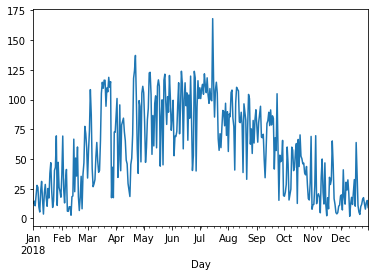

In [24]:
whack = MasterFrame.groupby(['Day']).mean()
whack['Solar'].plot()

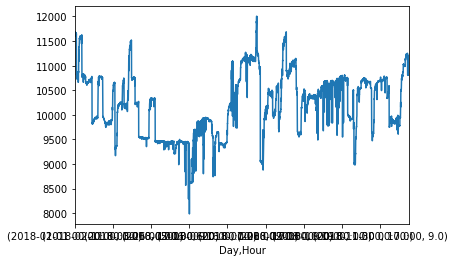

In [8]:
MasterFrame['Nuclear'].plot()

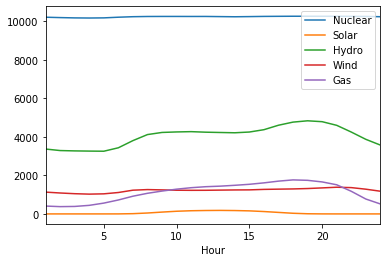

In [37]:
hourmeans = MasterFrame.groupby(['Hour']).mean()
hourmeans[['Nuclear','Solar','Hydro','Wind','Gas']].plot()

In [26]:
MasterFrame.std()

Nuclear        638.200251
Gas           1124.005622
Hydro          766.470377
Wind           936.995985
Solar           90.579479
Biofuel         50.455115
Production    1830.242634
HOEP            22.131897
Ontario       2318.553939
Market        2133.476285
dtype: float64

In [43]:
countframe = pd.merge(MasterFrame.reset_index(),hourmeans,left_on=['Hour'],right_on=['Hour'])
countframe = countframe.set_index(['Day','Hour'])

In [45]:
countframe['SolarMore'] = pd.Series(np.ones(8760))
countframe['SolarLess'] = pd.Series(np.ones(8760))

In [55]:
countframe['SolarMore'] = countframe['SolarMore'].where(countframe['Solar_x']>countframe['Solar_y']).fillna(0)
countframe['SolarLess'] = countframe['SolarLess'].where(countframe['Solar_x']<countframe['Solar_y']).fillna(0)

In [56]:
countframe

,,Nuclear_x,Gas_x,Hydro_x,Wind_x,Solar_x,Biofuel_x,Production_x,HOEP_x,Ontario_x,Market_x,...,Hydro_y,Wind_y,Solar_y,Biofuel_y,Production_y,HOEP_y,Ontario_y,Market_y,SolarMore,SolarLess
Day,Hour,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.0,11671.0,1583.0,4152.0,992.0,0.0,3.0,18401.0,51.29,16627,18974,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
2018-01-02,1.0,11663.0,948.0,3564.0,2871.0,0.0,12.0,19058.0,31.12,15809,19138,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
2018-01-03,1.0,10824.0,364.0,3747.0,3374.0,0.0,15.0,18324.0,2.31,16277,19030,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
2018-01-04,1.0,10821.0,940.0,3558.0,1961.0,0.0,46.0,17326.0,15.77,16223,18662,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
2018-01-05,1.0,10661.0,665.0,4706.0,2581.0,0.0,67.0,18680.0,18.50,17475,19752,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
2018-01-06,1.0,11377.0,1010.0,3948.0,2785.0,0.0,69.0,19189.0,42.71,17293,20432,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
2018-01-07,1.0,11581.0,2016.0,4811.0,846.0,0.0,171.0,19425.0,48.40,17015,20506,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
2018-01-08,1.0,11599.0,337.0,3338.0,2702.0,0.0,13.0,17989.0,0.00,15521,18439,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
2018-01-09,1.0,10806.0,292.0,3100.0,2586.0,0.0,18.0,16802.0,4.77,14900,17430,...,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,0.0,0.0
